# University Ranking Dataset Analysis

## Jessica Udsen

### Package and Data Imports

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

uni_data = pd.read_csv('World+University+Rankings+2023.csv')
uni_data.drop_duplicates().reset_index(drop = True)
uni_data.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


### How many universities?

In [2]:
uni_data = uni_data[uni_data['Name of University'].notnull()]
len(uni_data.index)

2233

### How many different countries are represented?

In [3]:
nonempty_country = uni_data.copy()
nonempty_country = nonempty_country[nonempty_country['Location'].notnull()]
nonempty_country['Location'].nunique()

116

### What is the distribution of countries in the top 100 universities?

In [4]:
uni_ranked = nonempty_country.copy()
uni_ranked = uni_ranked[pd.to_numeric(uni_ranked['University Rank'], errors='coerce').notnull()]
uni_ranked.loc[:, 'University Rank'] = pd.to_numeric(uni_ranked['University Rank'])
uni_ranked.sort_values('University Rank')
uni_ranked.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


In [5]:
uni_ranked.tail()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
193,194,University of Miami,United States,"17,009",10.8,16%,53 : 47,54.6,48.4,33.5,81.0,48.3,60.2
194,196,University of Erlangen-Nuremberg,Germany,"30,303",43.4,13%,51 : 49,54.5,44.6,47.5,68.8,90.7,53.5
195,196,Sichuan University,China,"49,543",15.8,6%,NaN,54.5,57.1,58.6,48.6,93.4,38.7
196,198,Durham University,United Kingdom,"18,425",14.1,35%,54 : 46,54.4,40.0,44.6,70.0,39.4,94.3
198,198,University of Reading,United Kingdom,"15,720",16.4,32%,56 : 44,54.4,36.5,39.6,78.5,42.2,93.3


In [6]:
top_100 = uni_ranked.copy()
top_100 = top_100.head(n = 100)

In [7]:
top_100.tail()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
126,127,Purdue University West Lafayette,United States,"44,551",16.9,20%,44 : 56,60.1,55.9,64.2,56.9,67.8,71.1
127,128,University of Hamburg,Germany,"30,676",61.5,12%,58 : 42,59.8,46.5,54.4,75.4,96.1,60.4
128,128,University of Leeds,United Kingdom,"33,990",14.6,36%,60 : 40,59.8,46.0,47.8,79.3,40.5,91.8
129,130,University of Nottingham,United Kingdom,"32,875",15.1,31%,54 : 46,59.6,41.8,44.1,86.6,41.7,90.4
130,131,University of Antwerp,Belgium,"15,857",32.2,17%,56 : 44,59.4,36.4,46.2,90.4,83.5,71.8


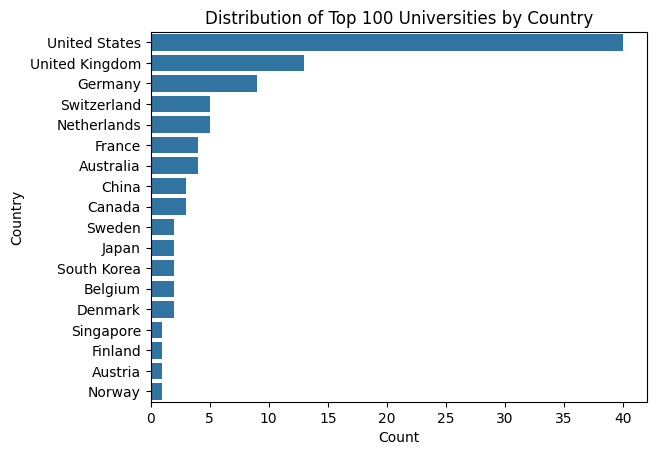

In [8]:
top_100_country_filter = top_100.copy()
top_100_country_filter.dropna(subset = ['Location'])
top_100_plot = sns.countplot(data = top_100_country_filter, 
                             y = 'Location',
                             order = top_100_country_filter['Location'].value_counts().index)
top_100_plot.set_title('Distribution of Top 100 Universities by Country')
top_100_plot.set(xlabel='Count', ylabel='Country')
plt.show()

In [9]:
top_100_country_grouped = top_100_country_filter.groupby(['Location']).agg('count')['Name of University'].sort_values(ascending = False)
top_100_country_grouped

Location
United States     40
United Kingdom    13
Germany            9
Switzerland        5
Netherlands        5
France             4
Australia          4
China              3
Canada             3
Denmark            2
South Korea        2
Sweden             2
Belgium            2
Japan              2
Finland            1
Austria            1
Norway             1
Singapore          1
Name: Name of University, dtype: int64

### What is the average number of students in top 10 universities?

In [10]:
top_10 = uni_ranked.copy()
top_10 = top_10.head(n = 10)
top_10

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
5,6,California Institute of Technology,United States,"2,237",6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6
6,7,Princeton University,United States,"8,279",8.0,23%,46 : 54,92.4,87.6,95.9,99.1,66.0,80.3
7,8,"University of California, Berkeley",United States,"40,921",18.4,24%,52 : 48,92.1,86.4,95.8,99.0,76.8,78.4
8,9,Yale University,United States,"13,482",5.9,21%,52 : 48,91.4,92.6,92.7,97.0,55.0,70.9
9,10,Imperial College London,United Kingdom,"18,545",11.2,61%,40 : 60,90.4,82.8,90.8,98.3,59.8,97.5


In [11]:
top_10['No of student'].dtype

dtype('O')

In [12]:
top_10.loc[:, 'No of student'] = top_10['No of student'].replace(',', '', regex = True).astype(int)
top_10

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,20965,10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,21887,9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,20185,11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,16164,7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,11415,8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
5,6,California Institute of Technology,United States,2237,6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6
6,7,Princeton University,United States,8279,8.0,23%,46 : 54,92.4,87.6,95.9,99.1,66.0,80.3
7,8,"University of California, Berkeley",United States,40921,18.4,24%,52 : 48,92.1,86.4,95.8,99.0,76.8,78.4
8,9,Yale University,United States,13482,5.9,21%,52 : 48,91.4,92.6,92.7,97.0,55.0,70.9
9,10,Imperial College London,United Kingdom,18545,11.2,61%,40 : 60,90.4,82.8,90.8,98.3,59.8,97.5


In [13]:
round(top_10['No of student'].mean(), 2)

17408.0

### 5. Which are the top 10 universities with more than 50% international students?

In [14]:
uni_international = uni_data.copy()
uni_international.loc[:, 'International Student'] = uni_international['International Student'].replace('%', '', regex = True)
uni_international = uni_international[pd.to_numeric(uni_international['International Student'], errors='coerce').notnull()]
uni_international = uni_international[pd.to_numeric(uni_international['University Rank'], errors='coerce').notnull()]
uni_international.loc[:, 'International Student'] = pd.to_numeric(uni_international['International Student'])
uni_international.loc[:, 'University Rank'] = pd.to_numeric(uni_international['University Rank'])
uni_international = uni_international[uni_international['International Student'] > 50]
uni_international.sort_values('University Rank', ascending = True).reset_index(drop = True).head(10)

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,10,Imperial College London,United Kingdom,"18,545",11.2,61,40 : 60,90.4,82.8,90.8,98.3,59.8,97.5
1,22,UCL,United Kingdom,"36,790",10.3,60,59 : 41,85.7,74.5,85.4,97.9,44.5,96.7
2,35,King’s College London,United Kingdom,"28,965",11.8,52,63 : 37,77.1,58.0,72.9,98.2,45.6,96.1
3,37,London School of Economics and Political Science,United Kingdom,"11,120",11.9,73,55 : 45,76.5,59.2,74.3,95.1,37.8,92.8
4,41,École Polytechnique Fédérale de Lausanne,Switzerland,"11,641",12.3,62,30 : 70,75.4,65.6,70.7,84.5,71.7,98.0
5,62,Australian National University,Australia,"16,758",14.6,51,52 : 48,69.0,51.3,69.2,81.8,45.6,96.0
6,99,City University of Hong Kong,NaN,"9,099",12.1,62,54 : 46,63.4,47.2,53.0,79.9,76.6,99.6
7,145,Maastricht University,Netherlands,"19,909",18.6,56,60 : 40,58.2,38.4,49.6,75.5,73.2,98.1


### 6. Which are the top 10 universities with a predominantly female presence?

In [15]:
def fm_fraction(ratio_str):
    if ':' in ratio_str:
        split = ratio_str.split(' : ')
        int_list = [int(string) for string in split]
        if len(int_list) == 2 and int_list[1] != 0:
            return round(int_list[0]/int_list[1], 1)
        else:
            return 0
    else:
        return 0

uni_gender = uni_data.copy()
uni_gender.dropna(subset=['Female:Male Ratio'], inplace = True)

uni_gender.loc[:, 'F/M Fraction'] = uni_gender['Female:Male Ratio'].copy()
uni_gender.loc[:, 'F/M Fraction'] = uni_gender['F/M Fraction'].apply(lambda x: fm_fraction(x))
uni_gender = uni_gender[uni_gender['F/M Fraction'] > 1]
uni_gender = uni_gender[pd.to_numeric(uni_gender['University Rank'], errors='coerce').notnull()]
uni_gender.loc[:, 'University Rank'] = pd.to_numeric(uni_gender['University Rank'])
uni_gender.sort_values('University Rank', ascending = True).reset_index(drop = True).head(10)

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,F/M Fraction
0,8,"University of California, Berkeley",United States,"40,921",18.4,24%,52 : 48,92.1,86.4,95.8,99.0,76.8,78.4,1.1
1,9,Yale University,United States,"13,482",5.9,21%,52 : 48,91.4,92.6,92.7,97.0,55.0,70.9,1.1
2,14,University of Pennsylvania,United States,"21,453",6.3,23%,53 : 47,88.8,86.0,88.8,97.0,75.8,71.5,1.1
3,15,Johns Hopkins University,United States,"17,584",4.7,29%,53 : 47,88.3,79.4,91.5,97.0,89.5,75.3,1.1
4,18,University of Toronto,Canada,"77,468",25.8,26%,56 : 44,87.4,77.3,93.3,92.8,65.5,89.7,1.3
5,21,"University of California, Los Angeles",United States,"42,434",9.7,16%,56 : 44,85.8,80.4,88.9,95.4,58.8,65.0,1.3
6,22,UCL,United Kingdom,"36,790",10.3,60%,59 : 41,85.7,74.5,85.4,97.9,44.5,96.7,1.4
7,24,New York University,United States,"36,337",9.8,42%,57 : 43,82.7,74.2,84.0,95.0,44.6,74.7,1.3
8,25,Duke University,United States,"16,091",4.2,24%,52 : 48,82.6,78.1,76.2,95.7,99.6,68.0,1.1
9,26,University of Washington,United States,"47,727",10.8,18%,55 : 45,82.1,71.6,82.8,98.9,53.9,63.0,1.2
